In [8]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage as ski
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

Practice with Thresholding, this is an image processing technique used to segment an image into regions, separating the objects of interest from the background. The goal is to convert a grayscale image into a binary image, where the pixels in the image are divided into two groups: those that meet a criterion (usually based on an intensity threshold) and those that do not.

In [9]:
im = data.coins()
im.shape

(303, 384)

First we are going to get an image in our variable 'im', here we obtain a image of some coins, we are going to work with that image. Our goal is to separate the coins from the background.

In [10]:
T = 127
imumbral = im > T
np.max(imumbral)

True

This code compares an image im with a threshold of 127 and creates a new binary image imumbral, where the pixels that exceed the threshold are marked as True (or 1) and those that do not are marked as False (or 0). Then, it checks if there is at least one pixel in the image that is greater than 127. If so, the result of np.max(imumbral) will be True (1); otherwise, it will be False (0)

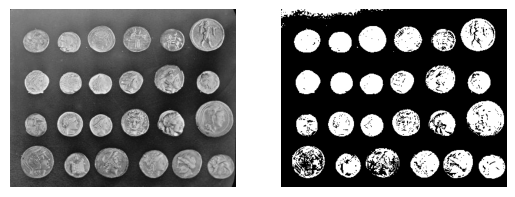

In [11]:
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(imumbral, cmap='gray')
plt.axis('off')
plt.show()

And here we have the comparison between the normal image and the image using thresholding. We see that in the second picture, we can only see white or black instead of a grayscale of colors. This is the outcome using 127 as our threshold value.

In [12]:
thresh = threshold_otsu(im)
imbin = im > thresh

Now we are going to do the same process, but now using the otsu algo, so we can get an optimum thresholding number.

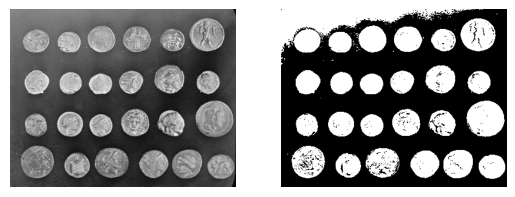

In [13]:
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(imbin, cmap='gray')
plt.axis('off')
plt.show()

As we can observe, the binary image has certain parts that are missing. To solve this problem, we will divide the original image into four parts so that the Otsu algorithm can be more precise when determining the threshold value.

In [14]:
rows, cols = im.shape
imbin = im.copy()
ts00 = threshold_otsu(im[:rows//2, :cols//2])
imbin[:rows//2, :cols//2] = im[:rows//2, :cols//2] > ts00
ts01 = threshold_otsu(im[:rows//2, cols//2:])
imbin[:rows//2, cols//2:] = im[:rows//2, cols//2:] > ts01
ts10 = threshold_otsu(im[rows//2:, :cols//2])
imbin[rows//2:, :cols//2] = im[rows//2:, :cols//2] > ts10
ts11 = threshold_otsu(im[rows//2:, cols//2:])
imbin[rows//2:, cols//2:] = im[rows//2:, cols//2:] > ts11

This code divides the image im into four quadrants and applies the Otsu algorithm independently to each of them to calculate an appropriate threshold for that specific region. Then, it converts each quadrant into a binary image based on the calculated threshold, combining these quadrants into the resulting binary image imbin. This approach improves the accuracy of thresholding in images with variations in lighting or contrast in different parts of the image.

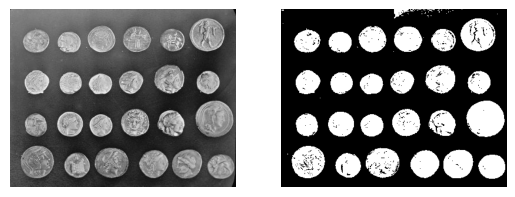

In [15]:
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(imbin, cmap='gray')
plt.axis('off')
plt.show()

And as we can see, we have successfully obtained a good binary image without any missing parts from the original picture.